<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.jpg" width=800 height=600 />

<h1><center><font size="5">EXAMEN DE LABORATORIO 1</font></center></h1>

# CASO 3 - RENTA Y VENTA

#### ING: K. MARLON SOZA MAMANI

Importación de librerías:

In [61]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Tenga en cuenta:

Tres estudiantes de posgrado extranjeros buscan un lugar donde vivir mientras realizan sus estudios en el pais de Brasil. Todos forman parte de un intercambio universitario pagado (a excepción del alojamiento) y desean comprar un inmueble donde quedarse mientras terminan su programa.

- El primer estudiante ha sido asignado a una universidad de Río de Janeiro. Así mismo busca comprar un apartamento pequeño de alrededor de 60 metros cuadrados.


- El segundo estudiante tiene la opción de seleccionar la universidad de estudio, por lo cual busca comprar un apartamento en una ciudad de la región sur. Así mismo, planea viajar con su familia por lo cual busca un tamaño de 105 metros cuadrados.


- El tercer estudiante busca establecerse inmediatamente después de haber llegado a la ciudad, por lo cual busca más bien comprar un casa de alrededor 125 metros cuadrados. Se le ha asignado la cuidad de Santa Catarina

¿Cuál sería el precio recomendando para cada caso?


Utilice el datasheet de la siguiente pagina:

https://www.kaggle.com/datasets/ashishkumarjayswal/brasil-real-estate


## Primer estudiante 

In [63]:
# --- Inserte código aqui
# --- Inserte código aqui
data = pd.read_csv('brasil.csv')

#apartament_data = data[data["property_type"] == "apartment"]
apartmentRioJ_data = data[(data["property_type"] == "apartment") & (data["state"] == "Rio de Janeiro")]
print(apartmentRioJ_data)


      Unnamed: 0 property_type           state     region        lat  \
3743        3744     apartment  Rio de Janeiro  Southeast -22.929174   
3745        3746     apartment  Rio de Janeiro  Southeast -22.930645   
3746        3747     apartment  Rio de Janeiro  Southeast -22.939283   
3747        3748     apartment  Rio de Janeiro  Southeast -22.888212   
3748        3749     apartment  Rio de Janeiro  Southeast -22.968903   
...          ...           ...             ...        ...        ...   
6738        6739     apartment  Rio de Janeiro  Southeast -22.974008   
6739        6740     apartment  Rio de Janeiro  Southeast -22.906298   
6740        6741     apartment  Rio de Janeiro  Southeast -23.013484   
6741        6742     apartment  Rio de Janeiro  Southeast -22.942118   
6742        6743     apartment  Rio de Janeiro  Southeast -22.906979   

            lon  area_m2   price_brl  
3743 -43.231567     90.0   888443.90  
3745 -43.240059     67.0   771652.49  
3746 -43.333138   

In [65]:

apartmentRioJ_data=apartmentRioJ_data.dropna()

In [86]:
# --- Obtener datos de las columnas (solo valores)
X = apartmentRioJ_data.values[:,6]
Y = apartmentRioJ_data.values[:,7]/1000
print(Y)

#print("Número de observaciones: "+str(len(Y)))

[888.4439 771.65249 631.8148199999999 ... 1403.33751 359.32595000000003
 349.34466]


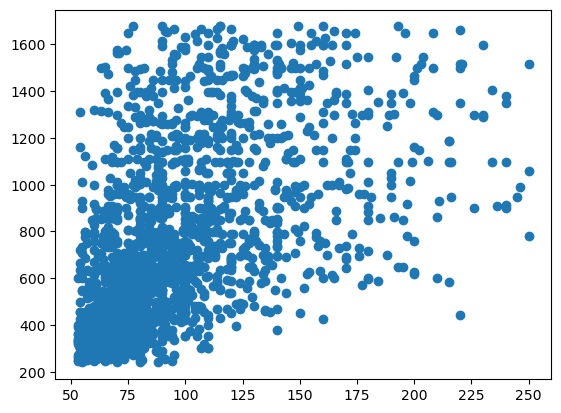

In [87]:
## Grafica con X sin empezar de cero
plt.scatter(X , Y)
plt.show()

In [101]:
w0 = 0 #Interceptor
w1 = 0 #Pendiente

n = 0.00000001 #Tamaño de paso
epochs = 10000 #Numero de Iterraciones
N = float(len(X)) #Numero de elementos en X

Error = [0]*epochs
T = np.arange(1, epochs+1)

In [102]:
#gradiente descendiente
for i in range(epochs):
    Y_pred = w0 + w1*X #Modelo predecido
    Error[i] = sum((Y-Y_pred)**2)
    D_w0 = (-2)*sum(Y-Y_pred)
    D_w1 = (-2)*sum((Y-Y_pred)*X)
    w0 = w0 - n*D_w0
    w1 = w1 - n*D_w1

In [103]:
print(w0,w1)

9.717517855491577 7.413159963760816


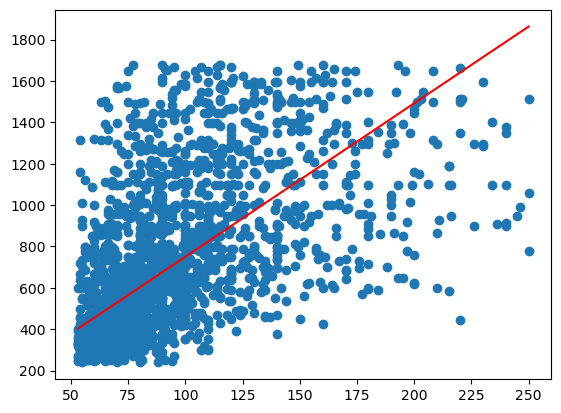

<Figure size 3500x1500 with 0 Axes>

In [104]:
Y_pred = w0 + w1 * X  # Reemplazamos Xnew por X

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
#plt.plot(X, Y_pred, color='red')
plt.figure(figsize=(35, 15))
plt.show()


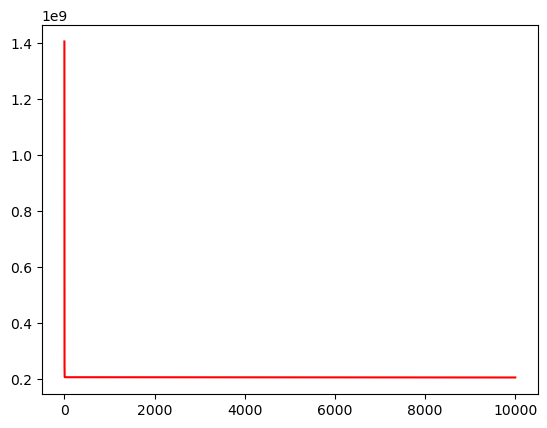

206305565.62066528


In [105]:
plt.plot(T, Error, '-r')
plt.show()
Min_E = min(Error)
print(Min_E)

## Prediccion del precio

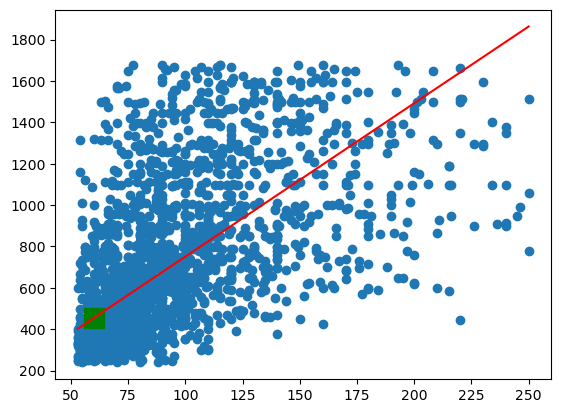

454.50711568114053


In [108]:
X_point = 60
Y_point = w0 + w1*X_point

plt.scatter(X, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(X), max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)

In [109]:
RES=454.50711568114053*1000
print(RES)

454507.1156811405


# RESULTADO 454507.1156811405

In [27]:
matriz = np.array(data)
columna_deseada = matriz[:, 1]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['apartment' 'house']
